             open  close    low   high     ma5       ma30
trade_date                                               
2020-01-20  72.00  72.95  65.00  73.50     NaN        NaN
2020-01-21  70.00  68.27  66.75  73.90     NaN        NaN
2020-01-22  66.51  66.40  62.33  67.19     NaN        NaN
2020-01-23  64.50  63.20  62.58  68.47     NaN        NaN
2020-02-03  52.77  46.06  45.98  54.04  65.156        NaN
...           ...    ...    ...    ...     ...        ...
2021-02-03  41.49  41.12  40.75  41.96  40.122  41.704333
2021-02-04  40.89  40.15  39.39  41.30  40.572  41.691000
2021-02-05  39.02  39.00  38.49  40.40  40.424  41.658333
2021-02-08  38.82  38.80  38.57  39.84  40.232  41.575000
2021-02-09  38.87  41.33  38.60  42.50  39.818  41.542667

[258 rows x 6 columns]


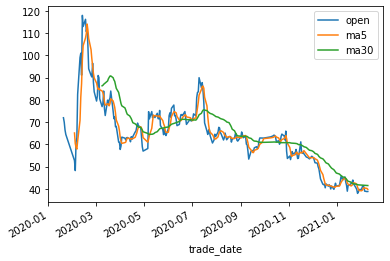

action:  sel 2020-04-27 00:00:00 0 1000000.0 67.66
action:  buy 2020-04-29 00:00:00 16900.0 2731.0 59.01
action:  sel 2020-05-11 00:00:00 0 1266344.0 74.77
action:  buy 2020-05-28 00:00:00 19500.0 3329.0 64.77
action:  sel 2020-06-03 00:00:00 0 1450229.0 74.2
action:  buy 2020-06-16 00:00:00 20200.0 3909.0 71.6
action:  sel 2020-06-19 00:00:00 0 1478711.0 73.01
action:  buy 2020-07-01 00:00:00 20800.0 1911.0 71.0
action:  sel 2020-07-03 00:00:00 0 1536327.0 73.77
action:  buy 2020-07-21 00:00:00 23800.0 1227.0 64.5
action:  sel 2020-09-04 00:00:00 0 1500627.0 63.0
action:  buy 2020-09-08 00:00:00 24900.0 3888.0 60.11
action:  sel 2020-09-29 00:00:00 0 1568604.0 62.84
action:  buy 2020-10-30 00:00:00 29200.0 563.9999999997672 53.7
action:  sel 2021-01-21 00:00:00 0 1285363.9999999998 44.0
action:  buy 2021-01-26 00:00:00 32300.0 2730.999999999767 39.71
代码： 688158.SH  本金: 1000000  账户余额: 1258231.9999999998  盈利: 258231.99999999977  当前价格: 38.87


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


st_number = '688158.SH'
first_money = 1000000

import tushare as ts
ts.set_token('a339e517ed9b1cb97cda578c2ee8fa829ef50d13ae3623a113227777')
pro = ts.pro_api()

df = pro.daily(ts_code=st_number, start_date='20100701', end_date='20210209')

df.to_csv(st_number+'.csv')

df = pd.read_csv(st_number+'.csv', index_col='trade_date', parse_dates=['trade_date'])[['open', 'close', 'low', 'high']].sort_index()

df['ma5'] = df['open'].rolling(5).mean()
df['ma30'] = df['open'].rolling(30).mean()

print(df)
df[['open', 'ma5', 'ma30']].plot()
plt.show()

df = df.dropna()


sre1 = df['ma5'] < df['ma30']
sre2 = df['ma5'] >= df['ma30']

golden_cross = df[sre1 & sre2.shift(1)].index
death_cross = df[~(sre1 | sre2.shift(1))].index

sr1 = pd.Series(1, index = golden_cross)
sr2 = pd.Series(0, index = death_cross)
sr = sr1.append(sr2).sort_index()

money = first_money
hold = 0

for i in range(0, len(sr)) :
    price = df['open'][sr.index[i]]
    action = 'buy'
    if sr.iloc[i] == 1:
        buy = (money // (price *100))   
        money -= buy * price * 100 
        hold += buy * 100
        # print(i,"   buy:", buy)
        action = 'buy'
    else:
        money += hold * price
        hold = 0
        action = 'sel'
    
    print('action: ',action, sr.index[i], hold, money, price)

current_price =df['open'][-1] 
now_money = hold * current_price + money

# if __name__ == '__main__':

# print(sr)
print('代码：', st_number,' 本金:',first_money,' 账户余额:',now_money , ' 盈利:',now_money-first_money, ' 当前价格:',current_price)